### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [6]:
# data.info()

missing_values = data.isnull().sum()
print(missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
summary_stats = data.describe()
print(summary_stats)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

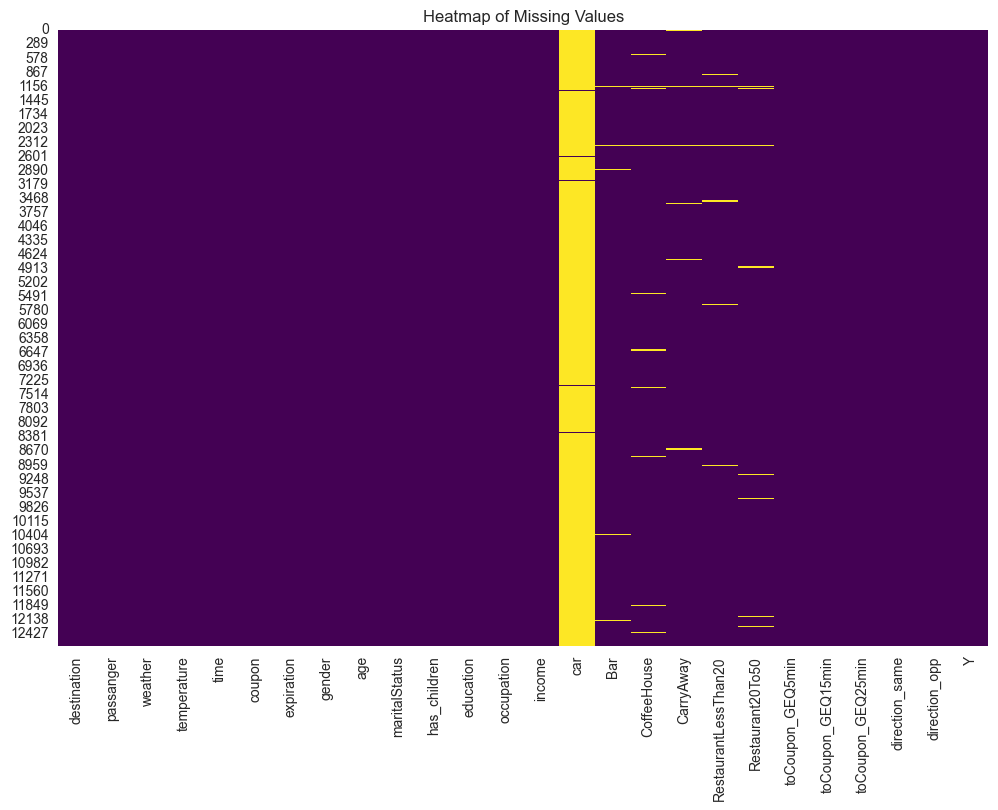

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

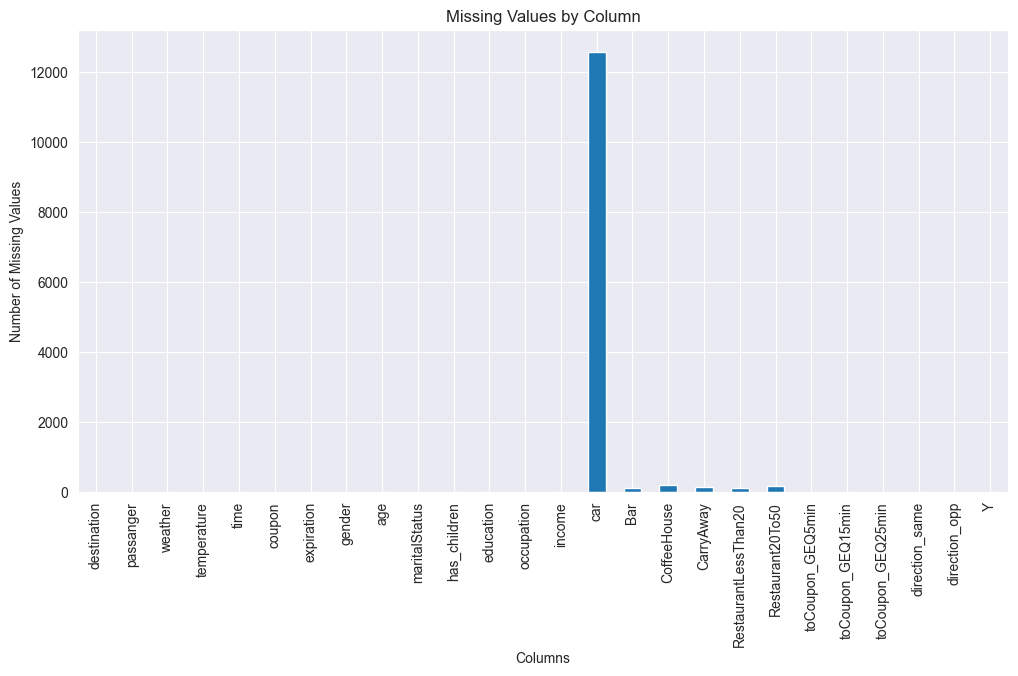

In [9]:
# Bar plot of missing values
missing_values.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [13]:
# Get total number of missing values
total_missing = data.isnull().sum().sum()
print("Total missing values:", total_missing)

# Get percentage of missing values
percentage_missing = (total_missing / np.product(data.shape)) * 100
print("Percentage of missing values:", percentage_missing)

Total missing values: 13370
Percentage of missing values: 4.054168789268127


In [14]:
# Get all columns and their datatypes
columns_and_dtypes = data.dtypes

# Print the result
print(columns_and_dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# The largest amount of missing data was for cars which is irrelevant for determining how likely someone will accept and use a coupon

4. What proportion of the total observations chose to accept the coupon? 



In [15]:
# Calculate the total number of observations
total_observations = len(data)

# Calculate the number of observations with a 1 in column Y
count_Y_1 = data['Y'].sum()

# Calculate the proportion
proportion_Y_1 = count_Y_1 / total_observations

# Print the proportion
print(f"Proportion of observations with a 1 in column Y: {proportion_Y_1:.2f}")

Proportion of observations with a 1 in column Y: 0.57


5. Use a bar plot to visualize the `coupon` column.

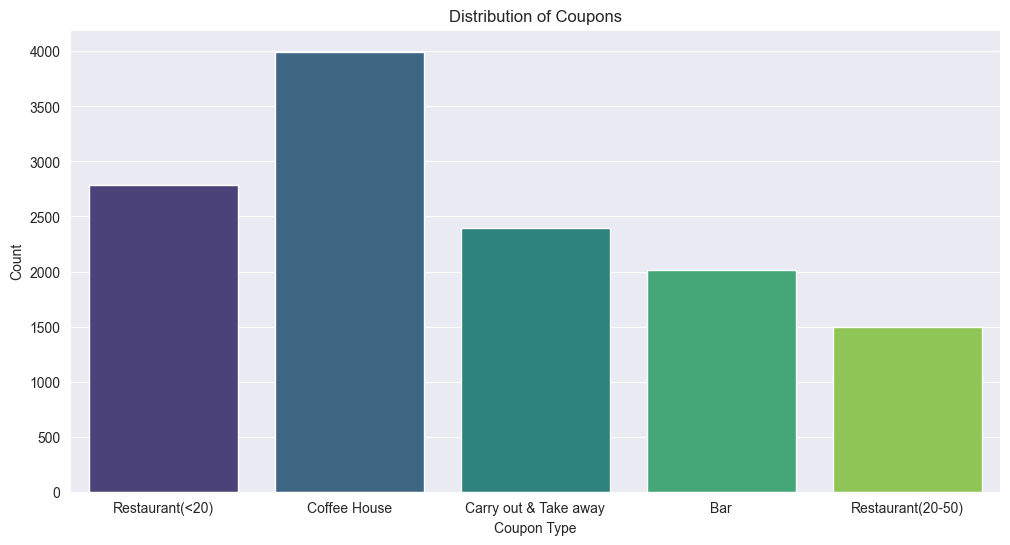

In [18]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='coupon', data=data, palette='viridis', hue='coupon')
plt.title('Distribution of Coupons')
plt.xlabel('Coupon Type')
plt.ylabel('Count')

# Save the plot as an image
plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

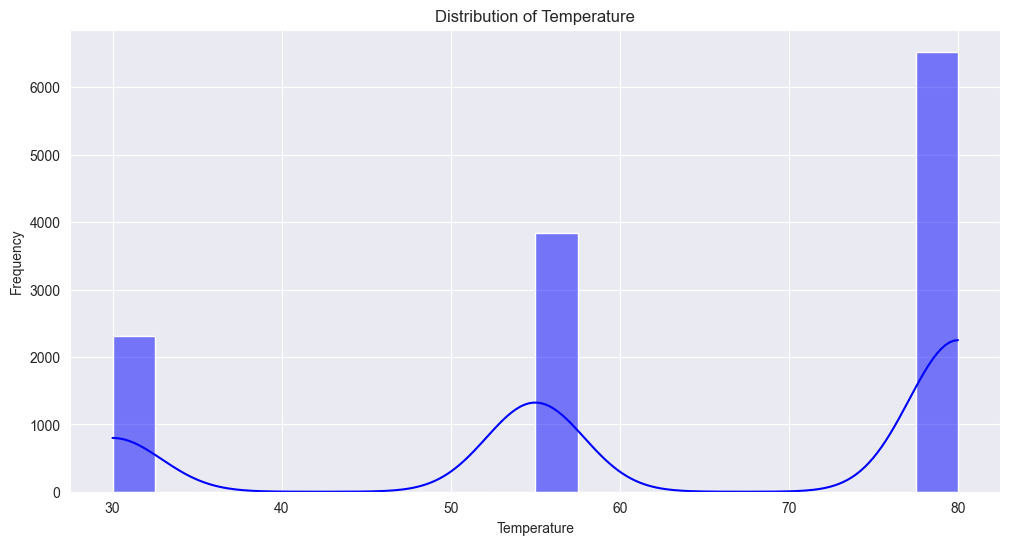

In [19]:
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['temperature'], bins=20, kde=True, color='blue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Save the plot as an image
plt.savefig('images/temperature_histogram.png')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [74]:
bar_df = data[data['coupon'] == 'Bar']
print(bar_df)
bar_df.head()

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [22]:
# Calculate the total number of observations
bar_total_observations = len(bar_df)

# Calculate the number of observations with a 1 in column Y
bar_count_Y_1 = bar_df['Y'].sum()

# Calculate the proportion
bar_proportion_Y_1 = bar_count_Y_1 / bar_total_observations

# Print the proportion
print(f"Proportion of observations with a 1 in column Y for Bars: {bar_proportion_Y_1:.2f}")

Proportion of observations with a 1 in column Y for Bars: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


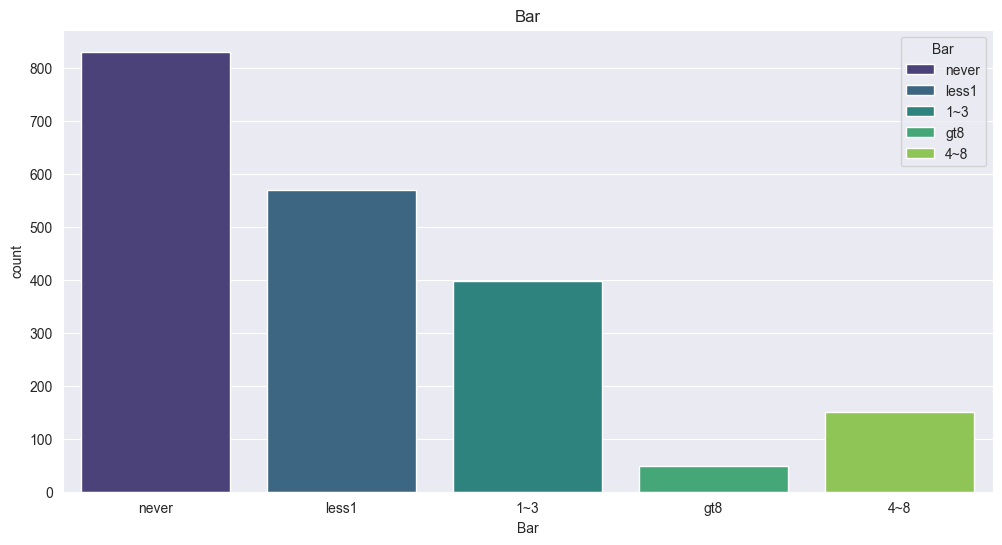

In [25]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='Bar', data=bar_df, palette='viridis', hue='Bar')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

In [36]:
# Replace the values in the 'Bar' column
bar_df.loc[:, 'Bar'] = bar_df['Bar'].replace({
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4
}).astype(float)

# Create two subsets: one for those who went to a bar 3 or fewer times, and one for those who went more than 3 times
few_bar_visits = bar_df[bar_df['Bar'] <= 3]
many_bar_visits = bar_df[bar_df['Bar'] > 3]

# Calculate acceptance rate for each subset
acceptance_rate_bar_few_visits = few_bar_visits['Y'].mean()
acceptance_rate_bar_many_visits = many_bar_visits['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for those who went to a bar 3 or fewer times: {acceptance_rate_bar_few_visits:.2f}")
print(f"Acceptance rate for those who went to a bar more than 3 times: {acceptance_rate_bar_many_visits:.2f}")

Acceptance rate for those who went to a bar 3 or fewer times: 0.37
Acceptance rate for those who went to a bar more than 3 times: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [38]:
# Convert the 'age' column to numeric (if it's not already)
bar_df.loc[:, 'age'] = pd.to_numeric(bar_df['age'], errors='coerce')

# Filter the DataFrame for drivers who go to a bar more than once a month and are over the age of 25
drivers_condition = bar_df[(bar_df['Bar'] > 1) & (bar_df['age'] > 25)]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~((bar_df['Bar'] > 1) & (bar_df['age'] > 25))]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 0.54
Acceptance rate for all other drivers: 0.33
Difference in acceptance rates: 0.21


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


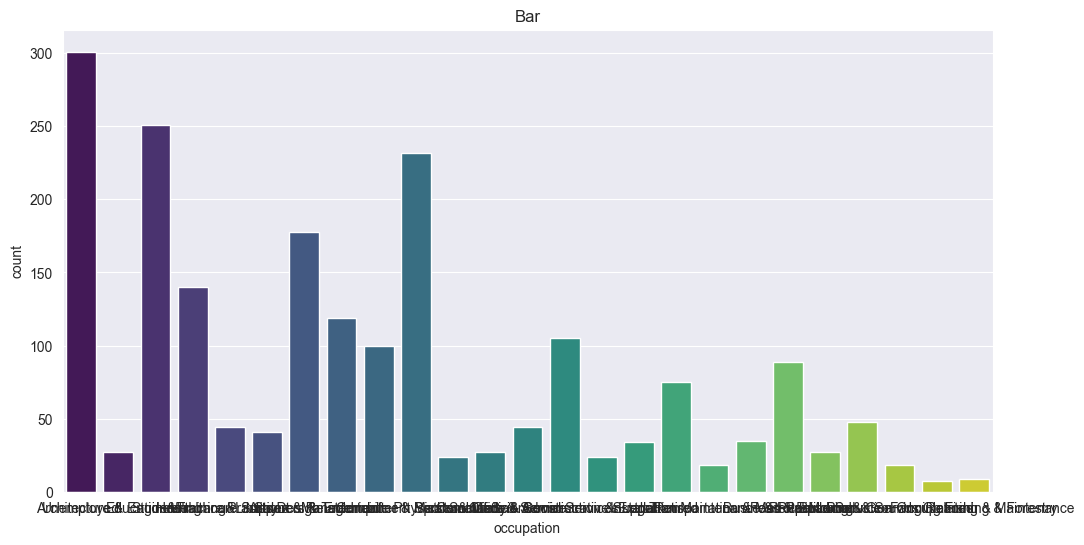

In [40]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=bar_df, palette='viridis', hue='occupation')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

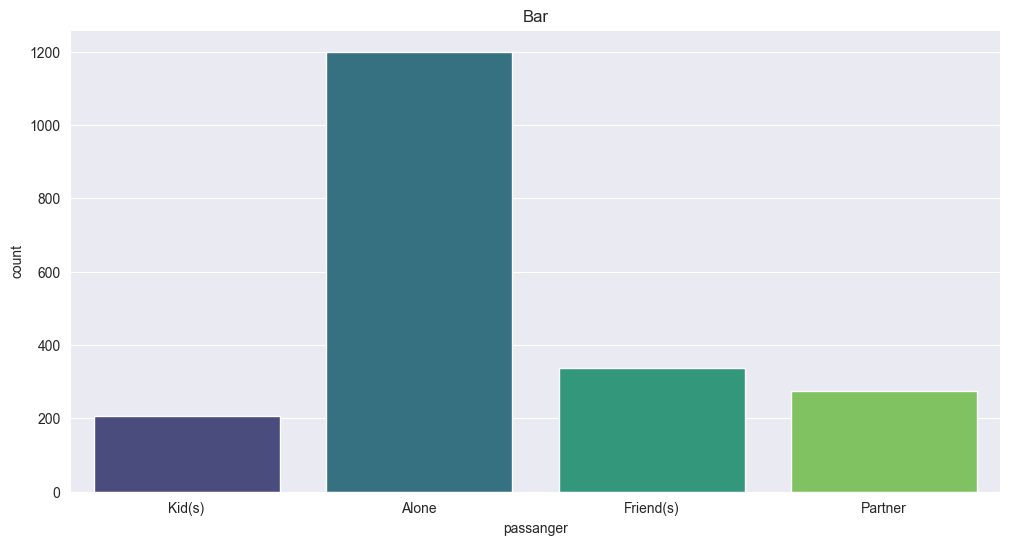

In [42]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='passanger', data=bar_df, palette='viridis', hue='passanger')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

In [44]:
# Define the conditions
bar_condition = bar_df['Bar'] > 1
passenger_condition = bar_df['passanger'] != 'Kid(s)'
occupation_condition = ~bar_df['occupation'].isin(['Farming', 'Fishing', 'Forestry'])

# Filter the DataFrame based on the conditions
drivers_condition = bar_df[bar_condition & passenger_condition & occupation_condition]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~(bar_condition & passenger_condition & occupation_condition)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and had occupations other than farming, fishing, or forestry: 0.59
Acceptance rate for all other drivers: 0.20
Difference in acceptance rates: 0.39


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



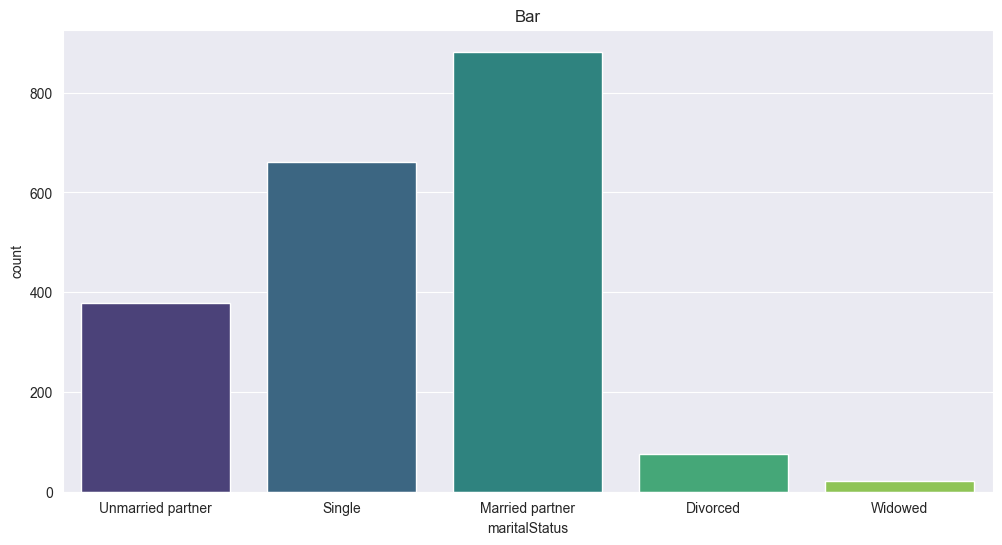

In [45]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='maritalStatus', data=bar_df, palette='viridis', hue='maritalStatus')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

In [47]:
# Define the conditions
bar_condition = bar_df['Bar'] > 1
passenger_condition = bar_df['passanger'] != 'Kid(s)'
not_widowed = bar_df['maritalStatus'] != 'Widowed'

# Filter the DataFrame based on the conditions
drivers_condition = bar_df[bar_condition & passenger_condition & not_widowed]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~(bar_condition & passenger_condition & not_widowed)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not kids, and were not widowed: 0.60
Acceptance rate for all other drivers: 0.20
Difference in acceptance rates: 0.40


In [48]:
# Define the conditions
bar_condition = bar_df['Bar'] > 1
under_30 = bar_df['age'] < 30

# Filter the DataFrame based on the conditions
drivers_condition = bar_df[bar_condition & under_30]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~(bar_condition & under_30)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month and were under 30: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who go to bars more than once a month and were under 30: 0.66
Acceptance rate for all other drivers: 0.32
Difference in acceptance rates: 0.34


In [ ]:
# Define the conditions
bar_condition = bar_df['Bar'] > 1
under_30 = bar_df['age'] < 30

# Filter the DataFrame based on the conditions
drivers_condition = bar_df[bar_condition & under_30]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~(bar_condition & under_30)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month and were under 30: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

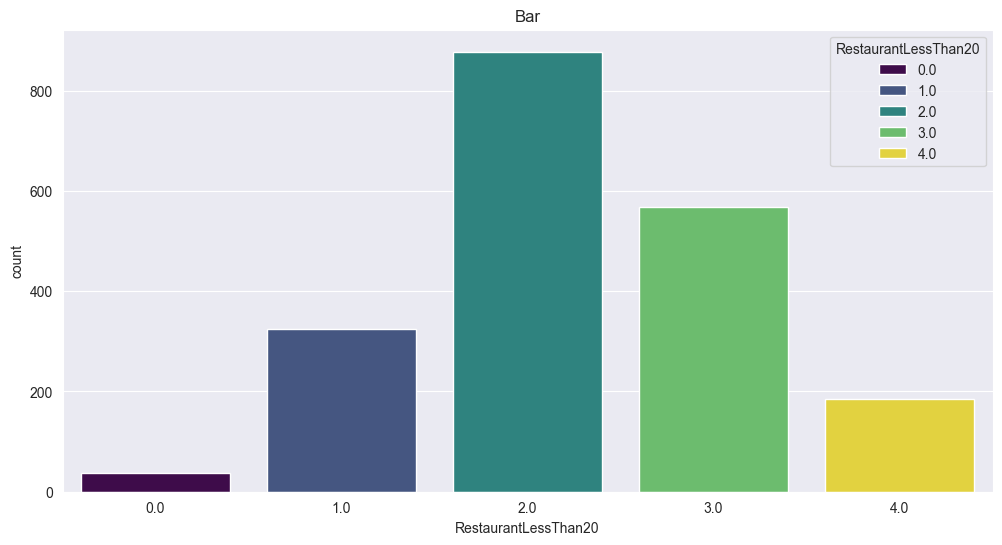

In [67]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='RestaurantLessThan20', data=bar_df, palette='viridis', hue='RestaurantLessThan20')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

In [68]:
# Replace the values in the 'Bar' column
bar_df.loc[:, 'RestaurantLessThan20'] = bar_df['RestaurantLessThan20'].replace({
    'never': 1,
    'less1': 2,
    '1~3': 3,
    '4~8': 4,
    'gt8': 5
}).astype(float)

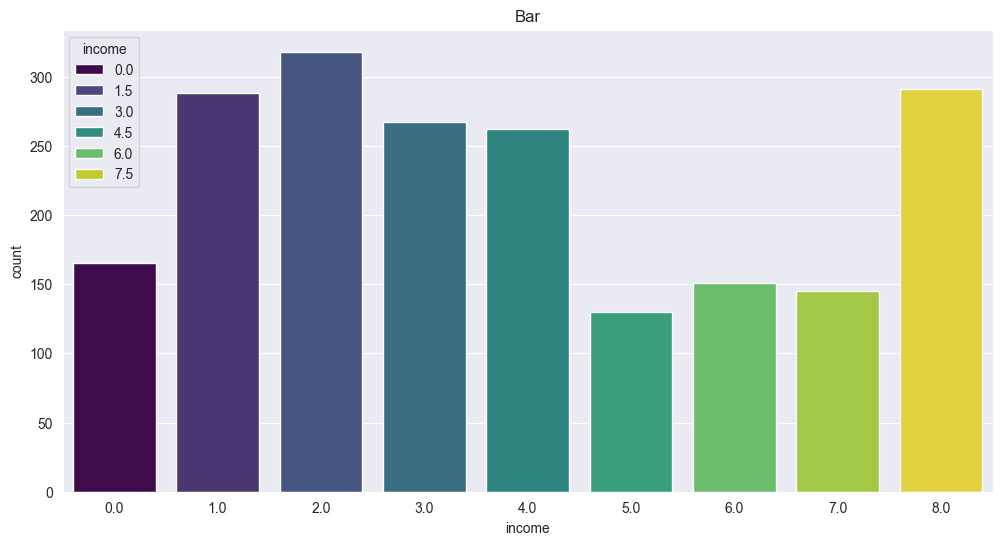

In [63]:
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='income', data=bar_df, palette='viridis', hue='income')
plt.title('Bar')

# Save the plot as an image
# plt.savefig('images/coupon_distribution.png')

# Show the plot
plt.show()

In [53]:
# Get the count of each unique value in the 'income' column
income_value_counts = bar_df['income'].value_counts()

# Print the result
print(income_value_counts)

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64


In [61]:
# Replace the values in the 'Bar' column
bar_df.loc[:, 'income'] = bar_df['income'].replace({
    'Less than $12500': 1,
    '$12500 - $24999': 2,
    '$25000 - $37499': 3,
    '$37500 - $49999': 4,
    '$50000 - $62499': 5,
    '$62500 - $74999': 6,
    '$75000 - $87499': 7,
    '$87500 - $99999': 8,
    '$100000 or More': 9
}).astype(float)

In [69]:
# Define the conditions
cheap_restaurant = bar_df['RestaurantLessThan20'] >= 4
less_than_50k = bar_df['income'] < 5

# Filter the DataFrame based on the conditions
drivers_condition = bar_df[cheap_restaurant & less_than_50k]

# Filter the DataFrame for all other drivers
other_drivers = bar_df[~(cheap_restaurant & less_than_50k)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50k: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and have an income less than 50k: 0.54
Acceptance rate for all other drivers: 0.40
Difference in acceptance rates: 0.13


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# The first observation on bar acceptance rate was that people that already went to a bar more than 3 times a month accepted the coupon at a higher rate
# The second observation is people that did not have underage passengers and were not widowed had the largest variance between accepting and not accepting the coupon
# Based on these main observations, it is clear bar frequency and age are the primary deciding factors on whether someone will accept the coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [98]:
carry_out_df = data[data['coupon'] == 'Carry out & Take away']
print(bar_df)
bar_df.head()

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


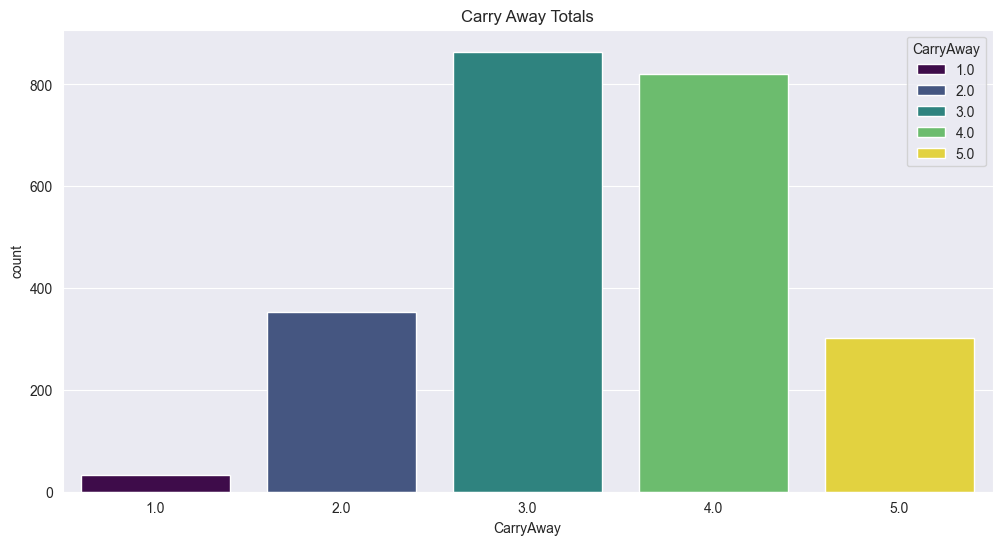

In [118]:
# Creating a bar graph of carry away 
# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='CarryAway', data=carry_out_df, palette='viridis', hue='CarryAway')
plt.title('Carry Away Totals')

# Save the plot as an image
plt.savefig('images/carry_away_totals.png')

# Show the plot
plt.show()

In [100]:
# Replace the values in the 'Bar' column
carry_out_df.loc[:, 'CarryAway'] = carry_out_df['CarryAway'].replace({
    'never': 1,
    'less1': 2,
    '1~3': 3,
    '4~8': 4,
    'gt8': 5
}).astype(float)

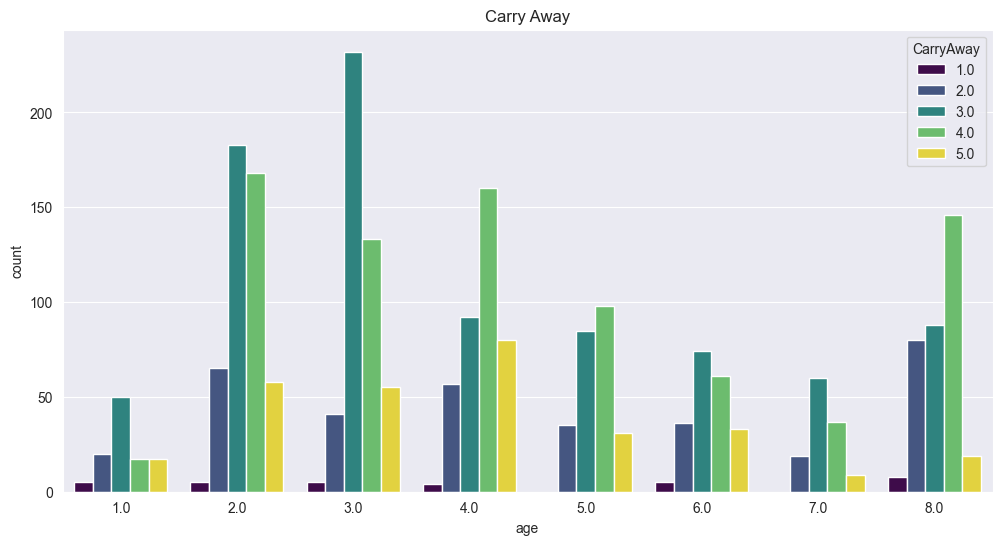

In [117]:
# Convert the 'age' column to numeric (if it's not already)
# carry_out_df.loc[:, 'age'] = pd.to_numeric(bar_df['age'], errors='coerce')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='age', data=carry_out_df, palette='viridis', hue='CarryAway')
plt.title('Carry Away')

# Save the plot as an image
plt.savefig('images/carry_away.png')

# Show the plot
plt.show()

In [103]:
# Replace the values in the 'Bar' column
carry_out_df.loc[:, 'age'] = carry_out_df['age'].replace({
    'below21': 1,
    '21': 2,
    '26': 3,
    '31': 4,
    '36': 5,
    '41': 6,
    '46': 7,
    '50plus': 8
}).astype(float)

In [106]:
# Define the conditions
carry_away_condition = carry_out_df['CarryAway'] > 1
under_30 = carry_out_df['age'] < 4

# Filter the DataFrame based on the conditions
drivers_condition = carry_out_df[carry_away_condition & under_30]

# Filter the DataFrame for all other drivers
other_drivers = carry_out_df[~(carry_away_condition & under_30)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who carry out more than once a month and were under 30: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who carry out more than once a month and were under 30: 0.73
Acceptance rate for all other drivers: 0.74
Difference in acceptance rates: -0.01


In [114]:
# Define the conditions
carry_away_condition = carry_out_df['CarryAway'] > 1
passenger_condition = carry_out_df['passanger'] == 'Kid(s)'

# Filter the DataFrame based on the conditions
drivers_condition = carry_out_df[carry_away_condition & passenger_condition]

# Filter the DataFrame for all other drivers
other_drivers = carry_out_df[~(carry_away_condition & passenger_condition)]

# Calculate acceptance rate for each subset
acceptance_rate_condition = drivers_condition['Y'].mean()
acceptance_rate_other = other_drivers['Y'].mean()

# Print the acceptance rates
print(f"Acceptance rate for drivers who carry out more than once a month, had passengers that were kids: {acceptance_rate_condition:.2f}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other:.2f}")

# Determine if there is a difference
difference = acceptance_rate_condition - acceptance_rate_other
print(f"Difference in acceptance rates: {difference:.2f}")

Acceptance rate for drivers who carry out more than once a month, had passengers that were kids: 0.73
Acceptance rate for all other drivers: 0.80
Difference in acceptance rates: -0.06
